In [1]:
# As usual, a bit of setup
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
Model = None 

In [3]:
import os
import numpy as np 
import cv2
import sys
import glob

import re

# https://stackoverflow.com/questions/4813061/non-alphanumeric-list-order-from-os-listdir
def sorted_aphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)


# Image dimension
im_width = 180
im_height = 180
im_channel = 3
dim = im_width * im_height * im_channel
dtype = np.float32
data = {}
data_dir_X = os.path.join('images','oopsie')
data_dir_Y = os.listdir(data_dir_X)
data_dir = []
for i in data_dir_Y:
    if i != ".DS_Store":
        data_dir.append(i)
print(data_dir)
#Label the images with 1 or 0
x_annotations = [1820,80,570,290,200]
y_annotations = [3096,420,840,1200,1830]
X = []
Y = []
for i in range(0, len(data_dir)):
    curr_path = os.path.join(data_dir_X, data_dir[i])
    kids = sorted_aphanumeric(os.listdir(curr_path))
    print(kids)
    for j in range (0, len(kids)):
        if (j >= x_annotations[i]) and (j <= y_annotations[i]):
            Y.append(1)
        else:
            Y.append(0)
        p = cv2.imread(os.path.join(curr_path, kids[j]))
        X.append(cv2.resize(p, (im_width, im_height)))
        
print(len(X))

X = np.array(X).astype("float32")
Y = np.array(Y).astype("float32")

# print(all_files)
n_files = X.shape[0]
#shuffle dataset
idxs = np.random.permutation(n_files)
X = X[idxs]
Y = Y[idxs]

# # SPlit training and test set
data['X_train'] = X[:len(X) - 200:]
data['X_test'] = X[len(X) - 200:]
data['y_train'] = Y[:len(Y) - 200:]
data['y_test'] = Y[len(Y) - 200:]

print(data['X_train'].shape)
print(data['X_test'].shape)
print(data['y_train'].shape)
print(data['y_test'].shape)

['Fighting018_x264', 'Fighting042_x264', 'Fighting003_x264', 'Fighting033_x264', 'Fighting047_x264']
['54.jpg', '60.jpg', '66.jpg', '72.jpg', '78.jpg', '84.jpg', '90.jpg', '96.jpg', '102.jpg', '108.jpg', '114.jpg', '120.jpg', '126.jpg', '132.jpg', '138.jpg', '144.jpg', '150.jpg', '156.jpg', '162.jpg', '168.jpg', '174.jpg', '180.jpg', '186.jpg', '192.jpg', '198.jpg', '204.jpg', '210.jpg', '216.jpg', '222.jpg', '228.jpg', '234.jpg', '240.jpg', '246.jpg', '252.jpg', '258.jpg', '264.jpg', '270.jpg', '276.jpg', '282.jpg', '288.jpg', '294.jpg', '300.jpg', '306.jpg', '312.jpg', '318.jpg', '324.jpg', '330.jpg', '336.jpg', '342.jpg', '348.jpg', '354.jpg', '360.jpg', '366.jpg', '372.jpg', '378.jpg', '384.jpg', '390.jpg', '396.jpg', '402.jpg', '408.jpg', '414.jpg', '420.jpg', '426.jpg', '432.jpg', '438.jpg', '444.jpg', '450.jpg', '456.jpg', '462.jpg', '468.jpg', '474.jpg', '480.jpg', '486.jpg', '492.jpg', '498.jpg', '504.jpg', '510.jpg', '516.jpg', '522.jpg', '528.jpg', '534.jpg', '540.jpg', '546

['0.jpg', '6.jpg', '12.jpg', '18.jpg', '24.jpg', '30.jpg', '36.jpg', '42.jpg', '48.jpg', '54.jpg', '60.jpg', '66.jpg', '72.jpg', '78.jpg', '84.jpg', '90.jpg', '96.jpg', '102.jpg', '108.jpg', '114.jpg', '120.jpg', '126.jpg', '132.jpg', '138.jpg', '144.jpg', '150.jpg', '156.jpg', '162.jpg', '168.jpg', '174.jpg', '180.jpg', '186.jpg', '192.jpg', '198.jpg', '204.jpg', '210.jpg', '216.jpg', '222.jpg', '228.jpg', '234.jpg', '240.jpg', '246.jpg', '252.jpg', '258.jpg', '264.jpg', '270.jpg', '276.jpg', '282.jpg', '288.jpg', '294.jpg', '300.jpg', '306.jpg', '312.jpg', '318.jpg', '324.jpg', '330.jpg', '336.jpg', '342.jpg', '348.jpg', '354.jpg', '360.jpg', '366.jpg', '372.jpg', '378.jpg', '384.jpg', '390.jpg', '396.jpg', '402.jpg', '408.jpg', '414.jpg', '420.jpg', '426.jpg', '432.jpg', '438.jpg', '444.jpg', '450.jpg', '456.jpg', '462.jpg', '468.jpg', '474.jpg', '480.jpg', '486.jpg', '492.jpg', '498.jpg', '504.jpg', '510.jpg', '516.jpg', '522.jpg', '528.jpg', '534.jpg', '540.jpg', '546.jpg', '552.j

2042
(1842, 180, 180, 3)
(200, 180, 180, 3)
(1842,)
(200,)


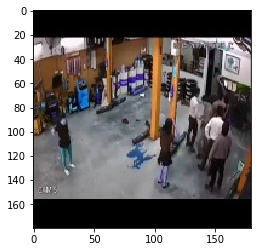

In [4]:
plt.imshow(data['X_train'][300].astype('uint8'))

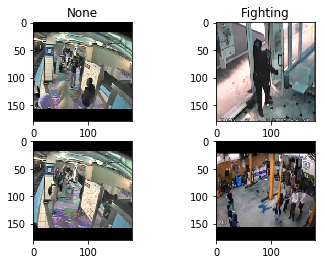

In [ ]:
# Visualize some images 
# Make sure that everything when OK
# classes = ['broadleaf', 'grass', 'soil', 'soybean']
n_class = 2
samples_per_class = 2

# Image dimension
im_width = 180
im_height = 180 
im_channel = 3


# for y, cls in enumerate(classes):
    
for y in range(n_class): #  2 class
    idxes = np.flatnonzero(y == data['y_train'])
    idxes = np.random.choice(idxes, samples_per_class, replace = False)
    
    for i, idx in enumerate(idxes):
        plt_idx = i * n_class + y + 1
        plt.subplot(samples_per_class,n_class, plt_idx)
        plt.imshow(data['X_train'][idx].reshape(im_width, im_height, im_channel).astype('uint8'))
        if(i==0):
            name = '' 
            if(y == 0):name = 'None'
            else: name = "Fighting"
            plt.title(name)

plt.show()

In [ ]:
print(data['y_train'].shape)

(1842,)


In [ ]:
class Dataset(object):
    def __init__(self, X_1,y_1 , n_batchs):
        self.X = X_1
        self.y = y_1
        self.n_batchs = n_batchs
        
    def to_dset(self):
        N = self.X.shape[0]
        print(N)
        idxs = np.random.permutation(N)
        self.X = self.X[idxs]
        self.y = self.y[idxs]
        
        item_per_batch = N // self.n_batchs
        batches = []
        
        for i in range(0,N, item_per_batch):
            if(i+item_per_batch > N): 
                batches.append((self.X[i:N],self.y[i:N]))
            else:
                batches.append((self.X[i:i+item_per_batch],self.y[i:i+item_per_batch]))
        return batches
        

In [ ]:
print(len(data['X_train']))
train_dset = Dataset(data['X_train'], data['y_train'], 10).to_dset()
# train_dset

for (a, b) in train_dset:
    print(a.shape, "and", b.shape)

1842
1842
(184, 180, 180, 3) and (184,)
(184, 180, 180, 3) and (184,)
(184, 180, 180, 3) and (184,)
(184, 180, 180, 3) and (184,)
(184, 180, 180, 3) and (184,)
(184, 180, 180, 3) and (184,)
(184, 180, 180, 3) and (184,)
(184, 180, 180, 3) and (184,)
(184, 180, 180, 3) and (184,)
(184, 180, 180, 3) and (184,)
(2, 180, 180, 3) and (2,)


In [ ]:

'''
CS231 HW.
'''
accuracy_hist= []
def check_accuracy(sess, dset, x, scores, is_training=None):
    """
    Check accuracy on a classification model.
    
    Inputs:
    - sess: A TensorFlow Session that will be used to run the graph
    - dset: A Dataset object on which to check accuracy
    - x: A TensorFlow placeholder Tensor where input images should be fed
    - scores: A TensorFlow Tensor representing the scores output from the
      model; this is the Tensor we will ask TensorFlow to evaluate.
      
    Returns: Nothing, but prints the accuracy of the model
    """
    num_correct, num_samples = 0, 0
    for x_batch, y_batch in dset:
        feed_dict = {x: x_batch, is_training: 0}
        scores_np = sess.run(scores, feed_dict=feed_dict)
        y_pred = scores_np.argmax(axis=1)
        num_samples += x_batch.shape[0]
        num_correct += (y_pred == y_batch).sum()
    
    acc = (float(num_correct) / num_samples)
    accuracy_hist.append(acc)
    print('Got %d / %d correct (%.2f%%)' % (num_correct, num_samples, 100 * acc))
    if(is_training == 1):
        return scores_np
        


    
train_acc_hist = []
def train_part34(model_init_fn, optimizer_init_fn, num_epochs=1):
    """
    Simple training loop for use with models defined using tf.keras. It trains
    a model for one epoch on the CIFAR-10 training set and periodically checks
    accuracy on the CIFAR-10 validation set.
    
    Inputs:
    - model_init_fn: A function that takes no parameters; when called it
      constructs the model we want to train: model = model_init_fn()
    - optimizer_init_fn: A function which takes no parameters; when called it
      constructs the Optimizer object we will use to optimize the model:
      optimizer = optimizer_init_fn()
    - num_epochs: The number of epochs to train for
    
    Returns: Nothing, but prints progress during trainingn
    """
    tf.reset_default_graph()    
    with tf.device(device):
        # Construct the computational graph we will use to train the model. We
        # use the model_init_fn to construct the model, declare placeholders for
        # the data and labels
        x = tf.placeholder(tf.float32, [None, 180, 180, 3])
        y = tf.placeholder(tf.int32, [None])
        
        # We need a place holder to explicitly specify if the model is in the training
        # phase or not. This is because a number of layers behaves differently in
        # training and in testing, e.g., dropout and batch normalization.
        # We pass this variable to the computation graph through feed_dict as shown below.
        is_training = tf.placeholder(tf.bool, name='is_training')
        
        # Use the model function to build the forward pass.
        scores = model_init_fn(x, is_training)
        model = scores
        # Compute the loss like we did in Part II
        loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=scores)
        loss = tf.reduce_mean(loss)

        # Use the optimizer_fn to construct an Optimizer, then use the optimizer
        # to set up the training step. Asking TensorFlow to evaluate the
        # train_op returned by optimizer.minimize(loss) will cause us to make a
        # single update step using the current minibatch of data.
        
        # Note that we use tf.control_dependencies to force the model to run
        # the tf.GraphKeys.UPDATE_OPS at each training step. tf.GraphKeys.UPDATE_OPS
        # holds the operators that update the states of the network.
        # For example, the tf.layers.batch_normalization function adds the running mean
        # and variance update operators to tf.GraphKeys.UPDATE_OPS.
        optimizer = optimizer_init_fn()
        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(update_ops):
            train_op = optimizer.minimize(loss)

    # Now we can run the computational graph many times to train the model.
    # When we call sess.run we ask it to evaluate train_op, which causes the
    # model to update.
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        t = 0
        for epoch in range(num_epochs):
            print('Starting epoch %d' % epoch)
            for x_np, y_np in train_dset:
#             batch_x_np = np.random.choice()
                feed_dict = {x: x_np, y: y_np, is_training:1}
                loss_np, _ = sess.run([loss, train_op], feed_dict=feed_dict)
                train_acc_hist.append(loss_np)
                if t % print_every == 0:
                    print('Iteration %d, loss = %f' % (t, loss_np))
                    check_accuracy(sess, train_dset, x, scores, is_training=is_training)
                    print()
                t += 1

In [ ]:

def model_init_fn(inputs, is_training):
    model = None
    ##################THIS TAKE EXTREMELY long to train.:( #######################
    ## [conv <-> bn <-> relu <-> drop]x2 <-> max_pool
    input_shape = (180, 180, 3)
    
    initializer = tf.variance_scaling_initializer(scale=2.0)
    cv1 = tf.layers.conv2d(inputs=inputs, filters=32, kernel_size=(3,3),
                               strides=(1,1), padding="same",kernel_initializer=initializer)
    bn1 = tf.layers.batch_normalization(inputs=cv1, training=is_training)
    relu1 = tf.nn.relu(bn1)
#     d1 = tf.layers.dropout(inputs=relu1, rate=0.5)
    
    cv2 = tf.layers.conv2d(inputs=relu1, filters=32, kernel_size=(3,3),
                               strides=(1,1), padding="same",kernel_initializer=initializer)
    bn2 = tf.layers.batch_normalization(inputs=cv2, training=is_training)
    relu2 = tf.nn.relu(bn2)
    #d2 = tf.layers.dropout(inputs=relu2, rate=0.5)
    pool1 = tf.layers.max_pooling2d(inputs=relu2, pool_size=(2,2), strides=(2,2)) #shape (16 x 16) 
    ##########
    
    ## [conv <-> bn <-> relu <-> drop]x2 <-> max_pool
    cv3 = tf.layers.conv2d(inputs=pool1, filters=64, kernel_size=(3,3),
                               strides=(1,1), padding="same",kernel_initializer=initializer)
    bn3 = tf.layers.batch_normalization(inputs=cv3, training=is_training)
    relu3 = tf.nn.relu(bn3)
    #d3 = tf.layers.dropout(inputs=relu3, rate=0.5)
    
    cv4 = tf.layers.conv2d(inputs=relu3, filters=64, kernel_size=(3,3),
                               strides=(1,1), padding="same",kernel_initializer=initializer)
    bn4 = tf.layers.batch_normalization(inputs=cv4, training=is_training)
    relu4 = tf.nn.relu(bn4)
    #d4 = tf.layers.dropout(inputs=relu4, rate=0.5)
    pool2 = tf.layers.max_pooling2d(inputs=relu4, pool_size=(2,2), strides=(2,2)) #shape (16 x 16) 
    #########
    
    flat = tf.layers.flatten(inputs=pool2)
    scores = tf.layers.dense(inputs=flat, units=100)# hidden unit
    scores = tf.layers.dense(inputs=scores, units=10) #num class
    net = scores 
    ###########################################################################
    ############################################################################
    #                            END OF YOUR CODE                              #
    ############################################################################
    return net

'''
def two_layer_fc_functional(inputs, hidden_size, num_classes):     
    initializer = tf.variance_scaling_initializer(scale=2.0)
    flattened_inputs = tf.layers.flatten(inputs)
    fc1_output = tf.layers.dense(flattened_inputs, hidden_size, activation=tf.nn.relu,
                                 kernel_initializer=initializer)
    scores = tf.layers.dense(fc1_output, num_classes,
                             kernel_initializer=initializer)
    return scores
'''
learning_rate = 1e-6
def optimizer_init_fn():
    optimizer = None
    ############################################################################
    # TODO: Construct an optimizer that performs well on CIFAR-10              #
    ############################################################################
    optimizer = tf.train.AdamOptimizer(learning_rate)
    ############################################################################
    #                            END OF YOUR CODE                              #
    ############################################################################
    return optimizer


device = '/cpu:0'
print_every = 1
num_epochs = 1
train_part34(model_init_fn, optimizer_init_fn, num_epochs)

Starting epoch 0
Iteration 0, loss = 4.005175
Got 0 / 1842 correct (0.00%)

Iteration 1, loss = 3.067756
Got 0 / 1842 correct (0.00%)

Iteration 2, loss = 2.630513
Got 0 / 1842 correct (0.00%)

Iteration 3, loss = 2.059525


In [ ]:
plt.plot(train_acc_hist)

In [ ]:
#Save model
from keras.models import load_model
model.save('dank.h5')

In [ ]:
def pred(sess, dset, x, scores, is_training=None):
    feed_dict = {x: x_batch, is_training: 0}
    scores_np = sess.run(scores, feed_dict=feed_dict)
    y_pred = scores_np.argmax(axis=1)
    return y_pred


pred_scores = None
def predict_tfrun(model_init_fn):  
    with tf.device(device):
        x = tf.placeholder(tf.float32, [None, 180, 180, 3])
        y = tf.placeholder(tf.int32, [None])

        is_training = tf.placeholder(tf.bool, name='is_training')
        
        scores = model_init_fn(x, is_training)
        
        loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=scores)
        loss = tf.reduce_mean(loss)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        feed_dict = {x: data['X_train'], y: data['y_train'], is_training:1}
        loss_np = sess.run([loss], feed_dict=feed_dict)
        pred_scores= pred(sess, train_dset, x, scores, is_training=is_training)

predict_tfrun(model_init_fn)

print(pred_scores)

In [ ]:
#https://stackoverflow.com/questions/33759623/tensorflow-how-to-save-restore-a-model
from tensorflow.python.saved_model import tag_constants
with tf.Graph().as_default():
    with tf.Session as sess:
        inputs={
            "":
        }